<a href="https://colab.research.google.com/github/YeddaMC/grafico_python_imers-o/blob/main/5_IPy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**BIBLIOTECAS**


In [ ]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from prophet import Prophet

dados = yf.download("JNJ", start="2020-01-01", end="2023-12-31", progress=False)
dados = dados.reset_index()
dados

**Separar dados**(**intervalo tempo**)
#* para treino e previsão*

In [ ]:
dados_treino = dados[dados['Date'] < '2023-07-31']
dados_teste = dados[dados['Date'] >= '2023-07-31']
dados_prophet_treino = dados_treino[['Date', 'Close']].rename(columns={'Date': 'ds', 'Close': 'y'})
dados_prophet_treino

**treinar e mostrar modelo-instanciar**


In [ ]:
modelo = Prophet(weekly_seasonality=True, yearly_seasonality=True, daily_seasonality=False)
modelo.add_country_holidays(country_name="US")
modelo.fit(dados_prophet_treino)


**criar datas futuras para previsao**


In [47]:
futuro=modelo.make_future_dataframe(periods=150)
previsao=modelo.predict(futuro)

In [ ]:
previsao


**plotar dados de treino,teste e previsão**


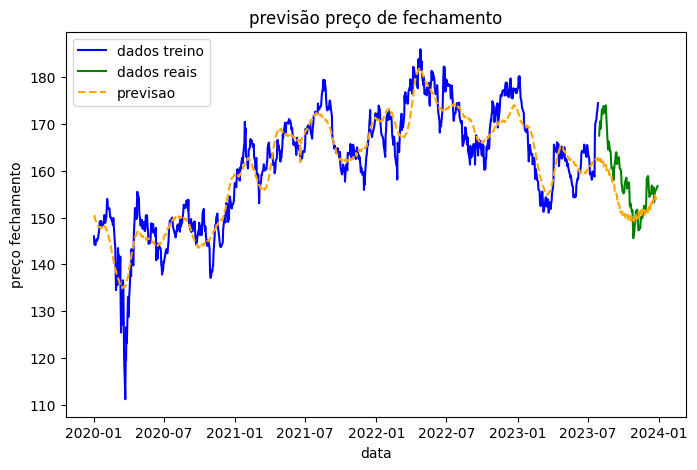

In [70]:
plt.figure(figsize=(8,5))
plt.plot(dados_treino['Date'],dados_treino['Close'],label='dados treino',color='blue')
plt.plot(dados_teste['Date'],dados_teste['Close'],label='dados reais',color='green')
plt.plot(previsao['ds'],previsao['yhat'],label='previsao',color='orange',linestyle="--")
#plt.axvline(dados_treino['Date'],max(),label='inicio da previsão',color='red',linestyle='--')
#retirando essa linha a legenda aparece??????
plt.xlabel("data")
plt.ylabel('preço fechamento')
plt.title('previsão preço de fechamento')
plt.legend()
plt.show()